# Lukujen esittäminen desimaali- ja binäärijärjestelmässä, muunnosalgoritmeja lukujärjestelmien välillä sekä kvanttilotto

Tässä artikkelissa kerrataan lukiomatematiikan lähtökohdista binäärijärjestelmän perusteet, ja esitellään lyhyesti algoritmeja miten luvun muuntaminen desimaalijärjestelmän ja binäärijärjestelmän välillä voidaan laskea. Ohjelmointiesimerkit on tehty pythonilla. Ohjelmointiesimerkit toteuttavat samat ideat mitä laskuesimerkeissä havainnollistetaan. Esimerkkien avulla on tarkoitus tukea algoritmisen ajattelun kehittymistä lukiossa.

Artikkelin lopussa esitellään lyhyesti kvanttitietokoneille tehty algoritmi, jossa binäärilukuesityksen avulla arvotaan kvanttitietokoneella lottonumerot väliltä 1- 40. Kvanttialgoritmin ohjelmointi sisältää vaikeampia tietorakenteita.

## Binäärijärjestelmässä kantaluku on kaksi

 Tavallisessa desimaalijärjestelmässä luvut esitetään kantaluvun $10$ potenssien avulla. Luvun esittämisessä käytettyjen numeroiden $0,1,2 ... 9$ paikka ilmaisee ykkösten, kymppien satojen... eli kantaluvun 10 potenssien lukumäärän. Esimerkiksi desimaalijärjestelmän luku $245$ voidaan hajoittaa muotoon:

 $$ 245= 2\cdot 100+ 4 \cdot 10 + 5\cdot 1 = 2\cdot 10^2 + 4\cdot 10^1 + 5\cdot 10^0$$


Binäärijärjestelmän kantaluku on $2$. Binääriluvussa bitin $0$ tai $1$ paikka ilmaisee mikä kantaluvun $2$ potenssi on kysessä. Esimerkiksi desimaalijärjestelmän luku $11_{10}$ saa binäärijärjestelmässä esitysmuodon $1011_2$ , koska

 $$11_{10} = 8+2+1 = 1 \cdot 2^3+0 \cdot 2^2 +1\cdot 2^1+1\cdot 2^0 = 1011_2$$  
 
Esimerkiksi binääriluku $11001_2$ voidaan muuttaa desimaalijärjestelmän luvuksi seuraavalla algortimilla:

 $$11001_2 = 1\cdot 2^4+ 1\cdot 2^3+0\cdot 2^2+0\cdot 2^1+1\cdot 2^0=16+8+1 = 25_{10}$$
 



###  Muunnokset binääriesityksen ja desimaalijärjestelmän välillä pythonissa

Tietokoneiden muistissa kaikki digitaalinen informaatio esitetään bittien avulla, bitin tila voi olla joko  $0$ tai $1$. Python-ohjelmointikielessä desimaalijärjestelmän luvun voi muuttaa binääriluvuksi komennolla `bin(kokonaisluku)`. Vastaavasti binääriluvun voi muuttaa desimaalijärjestelmään komennolla `int(binääriluku,2)`. Funktion  2.parametrina annettu luku $2$ ilmaisee, että 1.parametri on binääriluku. Pythonissa etuliite `0b` ilmaisee, että kyseessä on binääriluku. Tällöin esimerkiksi `print`-komento tunnistaa binääriluvun, ja antaa tulosteen desimaalijärjestelmässä. Esimerkkejä:

In [9]:
# Tulostetaan binääriluku 11010 eli desimaalijärjestelmän luku 26
print(0b11010)

26


In [10]:
# tai binääriliteraali
0b11010

26

In [10]:
# Annetaan alkuarvo muuttujalle a desimaalijärjestelmässä ja muutetaan luku binääriluvuksi
a = 26
b = bin(a)
print(b)

0b11010


In [27]:
# Annetaan muuttujalle b alkuarvo binäärilukuna, etuliite 0b ilmaisee, että kyseessä on binääri
b = "0b11010" # nyt muuttuja b on merkkijono eli string-tyyppiä
a = int(b,2)
print(a)
# desimaalijärjestelmän luvulla voi laskea
print(2*a+1)

26
53


### Algoritmeja lukujärjestelmästä toiseen siirtymiseksi

#### Binäärijärjestelmästä desimaalijärjestelmään

Seuravaaksi esitellään miten binääriluku $b$ voidaan laskemalla muuttaa desimaalijärjestelmän luvuksi $a$ kahdella erilaisella algoritmilla. 

<em>Menetelmässä 1</em> eli suorassa laskussa binääriluvun bitit $0$ ja $1$ antavat kertoimet kantaluvun $2$ eri potensseille:

$$10111_2= 1\cdot 2^4 +0\cdot 2^3+ 1\cdot 2^2+1\cdot 2^1+1\cdot 2^0 = 16+0+4+2+1 =23_{10}$$

Alla esimerkissä suora laskumenetelmä pythonilla toteutettuna kun binäärilkuku $b$ annetaan aluksi merkkijonona (esim. $0b11010$). Pythonissa potenssi ilmaistaan operaattorilla `**`. Kun binääriluku on merkkijono, sen sisältämiä bittejä voidaan indeksoida kuin listan alkioita välillä $0 ...len(b)-1$, missä funktion `len(b)` palauttama arvo ilmaisee merkkijonon pituuden. Esimerkiksi `b` kirjain on merkkijonossa `0b11010` indeksoitu luvulla 1 ja ykkösten määrän ilmaiseva bitti $0$ indeksin arvolla 6. Nämä merkit saadaan listasta `b[]` komeinnoilla `b[1]` ja `b[6]`. Merkkijonon bitit muunnetaan kokoknaisluvuiksi `int()` -funktiolla. Kun merkkijono tulkitaan listaksi `b[]`, sen alkioita voidaan käydä läpi `for`-silmukassa.

In [5]:
# Johdantoesimerkki
b = "0b11010"
print("Merkkijonon pituus: ", len(b))
print("Merkkijonon 2.merkki: ", b[1])
print("Ykkösten määrän ilmaiseva bitti: ", b[len(b)-1]) # sama kuin b[6]
# Muunnetaan binääriluku b desimaalijärjestelmän luvuksi
# desimaalijärjestelmän luvun alkuarvo
a = 0

# luvun (len(b)-i-1) avulla lasketaan kantaluvun 2 potenssit, joka on pythonissa operaattori **.
# merkkijono b käydään läpi takaperin viimeisestä alkiosta (ensimmäisestä bitistä) 0 oikealta vasemmalle.
for i in range(len(b)-1, 1, -1):
    print(b[i]) # voit kommentoida tämän pois
    a = a +int(b[i])*2**(len(b)-1-i)
    
print("binääriluku b desimaalijärjestelmässä: ", a)    

Merkkijonon pituus:  7
Merkkijonon 2.merkki:  b
Ykkösten määrän ilmaiseva bitti:  0
0
1
0
1
1
binääriluku b desimaalijärjestelmässä:  26


In [9]:
#Tapa 2:
b = "0b11010"
b = b.split('b')[1] #leikataan 0b merkkijonosta
print(b) 
bitlist =[] # tyhjä lista 
for bit in b:
    bitlist.append(bit) #lisätään merkkijonon alkiot listaaan
print(bitlist)
bitlist.reverse() # käännetään bittien järjestys laskemista varten
print(bitlist)

a = 0

for i in range(len(bitlist)):
    a = a + int(bitlist[i])*2**i
print("binääriluku desimaalilukuna: ",a)

11010
['1', '1', '0', '1', '0']
['0', '1', '0', '1', '1']
binääriluku desimaalilukuna:  26


#### Binäärijärjestelmästä desimaalijärjestelmään

<em>Menetelmässä 2</em> binäääriluku $10111_2$ tulkitaan desimaalijärjestelmän luvuksi ja lasketaan jakojäännöksiä kun luku jaetaan luvulla $10$. Jos jakojäännös tietyn bitin kohdalla on $1$, lisätään desimaalijärjestelmän lukuun tätä bittiä vastaava kantaluvun $2$ potenssi. Kokonaisjakoa käyttämällä piennennetäään lukua kunnes luku on nolla. Muunnetaan binääriluku $10111_2$ desimaalijärjestelmän luvuksi a yllä kuvatun algoritmin mukaisesti: 

Alustus: desimaalijärjestelmän luvun $a$ alkuarvo $a=0$.

1.kierros: Kun luku $10111_{10}$ jaetaan luvulla $10$, niin jakojäännös on $1$, eli desimaalijärjestelmän lukuun $a=0$ lisätään $a = 1\cdot 2^0$. Suoritetaan kokonaisjako $10111 : 10 = 1011$.

2.kierros: Kun luku $1011_{10}$ jaetaan luvulla $10$, niin jakojäännös on $1$, eli desimaalijärjestelmän lukuun $a=1$ lisätään luku $a = 1+ 1\cdot 2^1= 3$. Suoritetaan kokonaisjako $1011 : 10 = 101$.


3.kierros: Kun luku $101_{10}$ jaetaan luvulla $10$, niin jakojäännös on $1$, eli desimaalijärjestelmän lukuun $a=3$ lisätään luku $a = 3+ 1\cdot 2^2= 3+4=7$. Suoritetaan kokonaisjako $101 : 10 = 10$.

4.kierros: Kun luku $10_{10}$ jaetaan luvulla $10$, niin jakojäännös on $0$, eli desimaalijärjestelmän lukuun $a=7$ lisätään luku $a = 7+ 0\cdot 2^2= 7$. Suoritetaan kokonaisjako $10 : 10 = 1$.

5.kierros: Kun luku $1_{10}$ jaetaan luvulla $10$, niin jakojäännös on $1$, eli desimaalijärjestelmän lukuun $a=7$ lisätään luku $a = 7+ 1\cdot 2^4= 7 +16 = 23$. Suoritetaan kokonaisjako $1 : 10 = 0$. Algoritmin suoritus loppuu, koska kokonaisjaossa päädyttiin lukuun $0$.


Ohjelmoidaan pythonilla yllä esitetty algoritmi, jolla binääriluku muutetaan kymmenjärjestelmään.  Pythonissa operaattori `%` tarkoittaa jakojäännöksen laskemista, ja operaattori `//` kokonaisjakoa. Esimerkiksi operaatio `7 % 2` antaa tulokseksi `1` ja lasku `7 // 2` on `3`. Määritellään funktio `binToInt(b)`, joka muuttaa syötteenä samaamansa binääriluvun `b` desimaalijärjestelmän luvuksi. Kutsutaan tämän jälkeen funktiota `binToInt` ja muutetaan binääriluku $11010_2$ desimaalijärjestelmän luvuksi $26$. 

In [3]:
def binToInt(b): # anna syötteenä parametri eli binääriluku b ilman 0b-etuliitettä.
    # a on kokonaisluku desimaalijärjestelmässä
    a = 0
    #indeksi i
    i = 0 
    while b !=0:
        r = b % 10 # jakojäännös r on 0 tai 1
        a = a + r*2**i
        b = b // 10  # kokonaisjako luvulla 10
        print(b) # jos et halua suorituksen aikaisia välitulosteita, kommentoi tämä rivi pois.
        i = i +1

    return a


In [4]:
# kutsutaan funktiota binToInt()
binToInt(11010)

1101
110
11
1
0


26

#### desimaalijärjestelmästä binäärijärjestelmään

Seuravaaksi esitellään algoritmi miten desimaalijärjestelmän luku $a$ muutetaan binääriluvuksi $b$. Binääriluvun alkuarvoksi asetetaan nolla, eli $b =0$. Menetelmässä tutkitaan jakojäännöksiä kun desimaalijärjestelmän luku jaetaan binäärijärjestelmän kantaluvulla $2$. Jakojäännös $0$ tai $1$ lisätään binäärilukuun siihen kohtaan, minkä kantaluvun $10$ potenssi ilmaisee.  Muutetaan esimerkkinä luku $23_{10}$ binääriluvuksi $b$:

Alkuaskel $b =0_2$.

1.kierros: Kun luku $23_{10}$ jaetaan luvulla $2$, niin jakojäännös on $1$, eli lisätään bitti binääärilukuun $b=0 + 1\cdot 10^0 = 1_2$. Suoritetaan kokonaisjako $23 : 2 = 11_{10}$.

2.kierros: Kun luku $11_{10}$ jaetaan luvulla $2$, niin jakojäännös on $1$, eli lisätään bitti binääärilukuun $b=1 + 1\cdot 10^1 = 11_2$. Suoritetaan kokonaisjako $11 : 2 = 5_{10}$.

3.kierros: Kun luku $5_{10}$ jaetaan luvulla $2$, niin jakojäännös on $1$, eli lisätään bitti binääärilukuun $b=11 + 1\cdot 10^2 = 111_2$. Suoritetaan kokonaisjako $5 : 2 = 2_{10}$.

4.kierros: Kun luku $2_{10}$ jaetaan luvulla $2$, niin jakojäännös on $0$, eli lisätään bitti binääärilukuun $b=111 + 0\cdot 10^3 = 0111_2$. Suoritetaan kokonaisjako $2 : 2 = 1_{10}$.

5.kierros: Kun luku $1_{10}$ jaetaan luvulla $2$, niin jakojäännös on $1$, eli lisätään bitti binääärilukuun $b=0111 + 1\cdot 10^4 = 1011_2$. Suoritetaan kokonaisjako $1 : 2 = 0_{10}$. Algoritmin suoritus päättyy.

Alla sama algoritmi on kirjoitettu funktioksi `IntToBinary(a)`, jolla parametrina annettu desimaalijärjestelmän luku voidaan muuttaa binääriluvuksi. Kutsutaan funktiota parametrin arvolla 23.

In [20]:
# Funktio desimaalijärjestelmän luvun a binäärilukuesityksen muodostamiseksi
# bitit ovat käänteisessä järjestyksessä, jotta taulukon indeksi vastaa kantaluvun 2 potenssia
def IntToBinary(a):
    b = 0
    i = 0
    while a > 0:
        b = b +(a % 2)*10**i # lasketaan jakojäännös kun a jaetaan luvulla 2
        a = a // 2 # kokonaisjako
        i = i + 1
    return b

In [21]:
IntToBinary(23)

10111

In [23]:
IntToBinary(8)

1000

### Kvanttialgoritmi lottonumeroiden arvontaan


Kvanttitietokoneiden muistissa informaatio on esitetty klassisten bittien sijasta kubittien avulla. Yhden kubitin tila voi olla samanaikaisesti molempien tilojen 0 ja 1 yhdistelmä eli superpositio.

$$ \mid\psi> = a\mid0>+b\mid1> $$

Kubitin tilaa havainnollistetaan usein ns. Blochin pallon pinnalle päättyvänä vektorina. Porttien H, X, Y  tai  Z-kvanttiporttien operaatiot ovat kubittivektorin kiertoja tämän pallon pinnalla. Kun kubittiin operoidaan esimerkiksi kvanttiportilla H, niin päädytään tilanteeseen, jossa yhden kubitin tila on samanaikaisesti olla tilojen 0 ja 1 yhdistelmä:

$$ \mid\psi> = \frac{1}{\sqrt{2}}\mid0>+\frac{1}{\sqrt{2}}\mid1> $$

Alla olevassa koodiesimerkissä käytetään IBM:N qiskit python-kirjaston funktioita ja luodaan yhden kubitin kvanttipiiri. Kuvassa kubitin tila esitetään Blochin pallon pinnalla. Kun kubittiin operoidaan H-portilla, kubitti siirtyy tilojen 0 ja 1 yhdistelmätilaan. Jos superpositiotila mitataan, on yhtä suuri todennäköisyys mitata bitin arvoksi 0 tai 1. Huomaa, että tilavektorin kärki on yhtä kaukana pallon molemmista navoista.

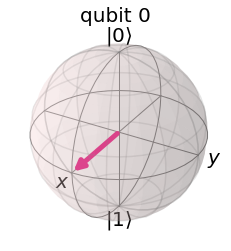

In [26]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
# Luodaan kvanttipiiri muuttujaan circuit, jossa on yksi kubitti (diagrammissa q).
circuit = QuantumCircuit(1) # kubitin alkutila on |0>
circuit.h(0) # operoidaan Hadamard-portilla H, joka kiertää qubitin tilavektorin
# jos tilavektori mitataan, saadaan lopputila 0 tai 1 samalla 50%:n todennäköisyydellä
# Piirretään qubitin kvanttitila blochin pallolle
backend = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

Kubitin lopullinen tila määräytyy vasta kun kvanttitietokoneessa mitataan kubitin sisältämä informaatio ja tallennetaan se klassisen tietokoneen muistiin. Kun kubitin tila mitataan, niin kubitti tuhoutuu ja saatu mittaustulos tallennetaan klassisen tietokoneen rekisteriin bitin arvona 0 tai 1. Suorittamalla hyvin suuri määrä identtisiä mittauksia aivan samalla systeemillä, saadaan selville todennäköisimmät lopputilat, joihin kubitit asettautuvat kvanttiporttien vaikutuksesta. Yhtälön kertoimet a ja b liittyvät kummankin tilan esiintymistodennäköisyyksiin: luvun $a$ neliö $a^2$ on todennäköisyys, että mittaustulokseksi saadaan klassinen bitti 0. Vastaavasti luvun $b$ neliö $b^2$ ilmaisee todennäköisyyden saada mittaustulokseksi bitti 1.


Kuvassa on esitetty miten Qiskit-kirjaston funktoiden avulla on määritelty kolmesta kubitista muodostuva kvanttipiiri.

![kuva1](images/kuva1.png)

Kun jokaiseen kubittiin q operoidaan Hadamard-portilla eli H-portilla, asettuvat kubitit toisistaan riippumatta tilojen 0 ja 1 superpositioon:

$$ \mid\psi> = \frac{1}{\sqrt{2}}\mid0>+\frac{1}{\sqrt{2}}\mid1> $$

Kun yksittäisen kubitin tila mitataan ja mittaustulos tallennetaan klassiseen rekisteriin (nuoli kuvassa), on molempien mahdollisten mittaustulosten 0 ja 1 todennäköisyys sama:

$$P\left(0\right)=P\left(1\right)=\left(\frac{1}{\sqrt{2}}\right)^2=0.5$$.

Koska jokaisella kolmella kubitilla on kaksi mahdollista lopputilaa, niin kolmen bitin mittaustulos voi olla 2^3 = 8 erilaista bittien 0 ja 1 yhdistelmää:

In [25]:
for i in range(0b111+1):
    print(bin(i))

0b0
0b1
0b10
0b11
0b100
0b101
0b110
0b111


Kaikilla bittien $0$ ja $1$ yhdistelmillä on sama todennäköisyys, koska kubitin tilan määräytyessä mittaustapahtumassa jokaisella mitatulla bitillä on 50% :n esiintymistodennäköisyys olla $0$ tai $1$. Kun haluamme esittää arvottavat lottonumerot väliltä $1-40$, niin tarvitsemme luvun $40=32 +8= 2^5+2^3$ esittämiseen vähintään 6 bittiä ($2^5$ ja lisäksi $2^0$).

In [24]:
from qiskit import *
from qiskit.tools.monitor import job_monitor

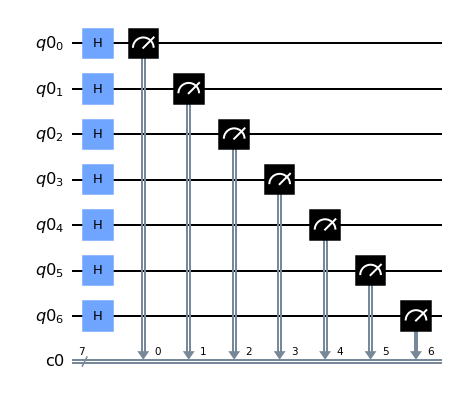

In [10]:
num_bits = 7
num_numbers = 7
qr = QuantumRegister(num_bits)
cr = ClassicalRegister(num_bits)
circuit = QuantumCircuit(qr, cr)

for i in range(num_bits):
    circuit.h(i)

circuit.measure(qr, cr)

circuit.draw(output="mpl")

Yllä olevassa kuvassa kubiteilla $0 -6$ on jokaisella 50%:n todennäköisyys asettua mittauksessa lopputilaan $0$ tai $1$. Kun kvanttialgoritmisuoritetaan saadaan tulokseksi satunnainen binääriluku, jossa on $7$ bittiä. Algoritmi simuloidaan tietokoneella hyvin montakertaa ja mittaustuloksina saadut erilaiset 7:n bitin yhdistelmät ja niiden esiintymisfrekvenssit tallennetaan python sanakirjaan. Lottonumeroksi valitaan se binääriluku, jolla on suurin esiintymisfrekvenssi. Jos numero on jo valittu tai numero suurempi kuin 40, niin arvonta suoritetaan uudelleen.

In [11]:
# Voit selvittää mitä palveluita on käytössä
#from qiskit import IBMQ, Aer # tämä import suoritettiin jo yllä
provider = IBMQ.load_account()
available_cloud_backends = provider.backends() 
print('\nKäytettävissäsi olevat palvelut verkossa: ')
for i in available_cloud_backends: print(i)

available_local_backends = Aer.backends() 
print('\n Paikalliset koneellesi käytössä olevat palvelut: ')
for i in available_local_backends: print(i)


Käytettävissäsi olevat palvelut verkossa: 
ibmq_qasm_simulator
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila

 Paikalliset koneellesi käytössä olevat palvelut: 
aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [12]:
# vaihtoehto 1: Simuloidaan piirin toiminta paikallisesti omalla tietokoneella
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator)


In [ ]:
# TAi vaihtoehto 2: suoritetaan oikealla kvanttikoneella
#IBMQ.load_account()
#provider = IBMQ.get_provider("ibm_q")
# Ajetaan ohjelma oikealla Ateenassa olevalla kvanttitietokoneella
#computer = provider.get_backend("ibmq_lima")
#result = execute(circuit, backend=computer) # Testataan kvanttipiirin toiminta

In [13]:
job_monitor(result)
print(result.result().get_counts())

Job Status: job has successfully run
{'0111111': 9, '0100001': 8, '1110010': 8, '0011001': 4, '1010101': 8, '1001111': 10, '1110011': 9, '0100000': 4, '0010100': 15, '1101010': 13, '0110010': 7, '0101110': 9, '1111111': 6, '1000011': 12, '0000101': 10, '1110101': 5, '0110011': 7, '0101101': 11, '1111110': 7, '1000000': 6, '0000110': 15, '0101111': 10, '0110001': 7, '1000100': 10, '1111010': 9, '0101011': 8, '0110101': 8, '0111101': 7, '0100011': 6, '0101001': 9, '1000101': 4, '0110100': 8, '0101100': 6, '1001011': 3, '1110111': 9, '0100100': 7, '0111100': 5, '1101111': 17, '0010011': 10, '1110001': 5, '1001101': 16, '0001011': 9, '0011000': 6, '1010100': 8, '1101100': 8, '1100111': 7, '0110000': 10, '1111101': 7, '1000001': 8, '0000111': 5, '1010111': 11, '0011111': 8, '1100011': 12, '0110110': 6, '0101010': 5, '1111011': 6, '1000111': 6, '0010111': 11, '0010010': 6, '1010000': 11, '0001001': 11, '1110100': 6, '1001010': 3, '1011100': 4, '0010101': 8, '1011001': 9, '1111001': 10, '0100

In [14]:
def lotto(circuit, simulator):
    
    r = execute(circuit, backend=simulator).result()
    numerot = {}
    
    max_value = 0
    max_key = 0
    isMaxUnique = True
    
    for key, value in r.get_counts().items():
        if value > max_value:
            max_value = value
            max_key = key
            isMaxUnique = True
        elif value == max_value:
            isMaxUnique = False
    
    # Jos saadaan tulokseksi 0 tai yli 40, heitetään uudelleen.
    # Myös jos on kaksi yhtä todennäköistä vastausta, joudutaan heittämään uudelleen
    
    if not isMaxUnique or int(max_key,2)  == 0 or int(max_key,2) > 40:
        return lotto(circuit, simulator)
    
    return int(max_key, 2)

In [15]:
# testataan, arvotaan yksi lottopallo väliltä 1 - 40
print(lotto(circuit, simulator))

3


In [16]:
# Arvotaan 7 oikein numerot
numbers = []
while len(numbers) < num_numbers:
    number = lotto(circuit, simulator)
    if number not in numbers:
        numbers.append(number)
        print(numbers)
        
numbers.sort()
print("arvotut numerot ovat: ", numbers)

[12]
[12, 13]
[12, 13, 4]
[12, 13, 4, 3]
[12, 13, 4, 3, 16]
[12, 13, 4, 3, 16, 18]
[12, 13, 4, 3, 16, 18, 8]
arvotut numerot ovat:  [3, 4, 8, 12, 13, 16, 18]
